# **Esercizio Scikit-Learn**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

1. Carica il dataset Iris.

In [16]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data 
y = data.target

In [39]:
df_wine = pd.DataFrame(X, columns=data.feature_names)
df_wine['target'] = y

In [40]:
df_wine['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [41]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


2. Standardizza le caratteristiche utilizzando StandardScaler.

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
df_wine_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)
df_wine['target'] = y

In [45]:
df_wine_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


3. Suddividi i dati in training e test set (70% training, 30% test).


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [24]:
print("Dimensione dataset di partenza:", X_scaled.size,"\nDimensione training set:",X_train.size,"\nDimensione test set:",X_test.size)

Dimensione dataset di partenza: 2314 
Dimensione training set: 1612 
Dimensione test set: 702


4. Applica l'algoritmo DecisionTreeClassifier.

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

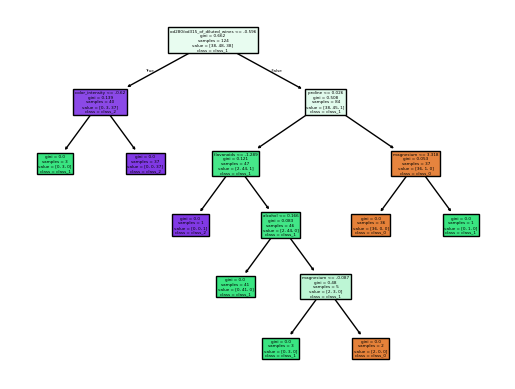

In [37]:
from sklearn.tree import plot_tree
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [26]:
errori = y_test - y_pred

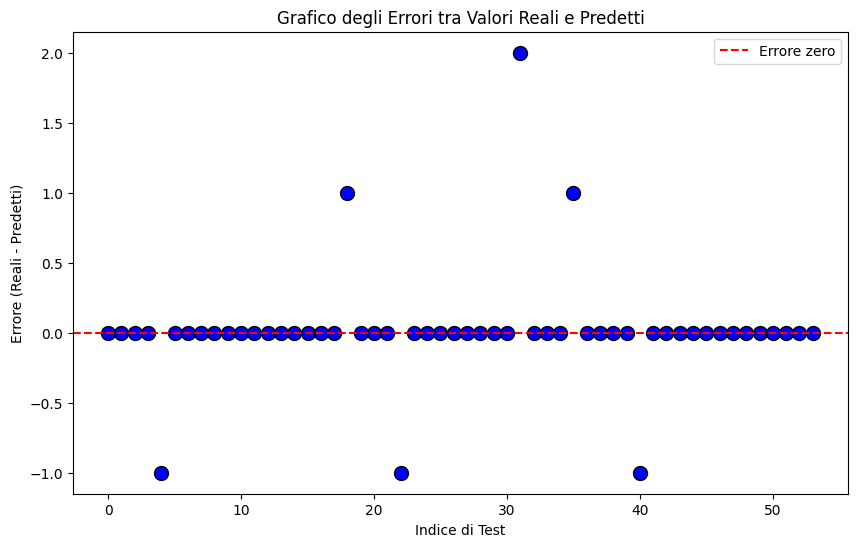

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(errori)), errori, color='blue', edgecolor='k', s=100)
plt.axhline(y=0, color='red', linestyle='--', label='Errore zero')
plt.xlabel('Indice di Test')
plt.ylabel('Errore (Reali - Predetti)')
plt.title('Grafico degli Errori tra Valori Reali e Predetti')
plt.legend()
plt.show()

5. Valuta la performance del modello utilizzando il classification_report (precisione, recall, F1-score).

In [29]:
from sklearn.metrics import classification_report, accuracy_score
metrics = classification_report(y_test, y_pred)

In [30]:
accuracy = accuracy_score(y_test, y_pred,normalize=False)

In [33]:
print("Elementi non classificati correttamente:",len(y_test)-int(accuracy))

Elementi non classificati correttamente: 6


In [6]:
print(metrics)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.78      0.88        23
           2       0.75      0.90      0.82        10

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.88        54
weighted avg       0.91      0.89      0.89        54



6. Visualizza la matrice di confusione.

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
cm = confusion_matrix(y_test, y_pred)

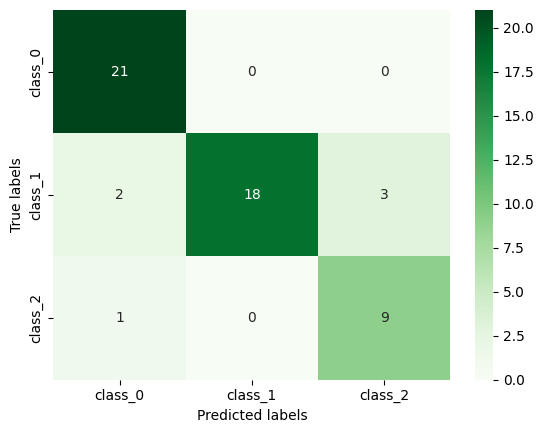

In [47]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()